<a href="https://colab.research.google.com/github/lodxdy/AI-ML/blob/main/AI_and_ML_Complete_Guide_Image_generation_with_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image generation with Stable Diffusion





**`[ ! Attention ]`** It is important to check the license of the models, especially if you intend to make some commercial use with the obtained results.

Summary:

```
1. You can't use the model to deliberately produce nor share illegal or harmful outputs or content,
2. We claim no rights on the outputs you generate, you are free to use them and are accountable for their use which should not go against the provisions set in the license, and
3. You may re-distribute the weights and use the model commercially and/or as a service. If you do, please be aware you have to include the same use restrictions as the ones in the license and share a copy of the CreativeML OpenRAIL-M to all your users.
```
(Licence of v1.4 e v1.5 https://huggingface.co/spaces/CompVis/stable-diffusion-license)


In [ ]:
!nvidia-smi

Tue Aug 29 15:33:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Installing the libraries

- [xformers](https://github.com/facebookresearch/xformers) to memory optimization



In [ ]:
!pip install diffusers
!pip install -q accelerate transformers ftfy bitsandbytes gradio natsort safetensors xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.0/167.0 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 36.0 MB/s eta 0:0

## Pipeline for image generation

- We can define with little effort a pipeline to use the Stable Diffusion model, through the [StableDiffusionPipeline](https://github.com/huggingface/diffusers/blob/main/src/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py)


In [ ]:
import torch # PyTorch
from diffusers import StableDiffusionPipeline

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

safety_checker/pytorch_model.fp16.safetensors not found


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
pipe = pipe.to('cuda')
pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()

### Creating the prompt

In [ ]:
prompt = 'an apple'

### Generating the image



In [ ]:
img = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
type(img)

PIL.Image.Image

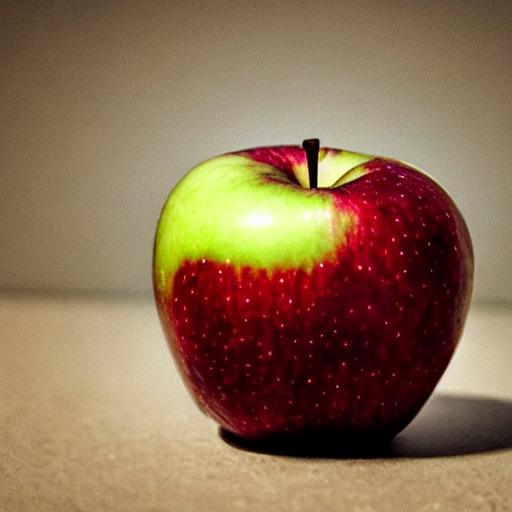

In [ ]:
img

  0%|          | 0/50 [00:00<?, ?it/s]

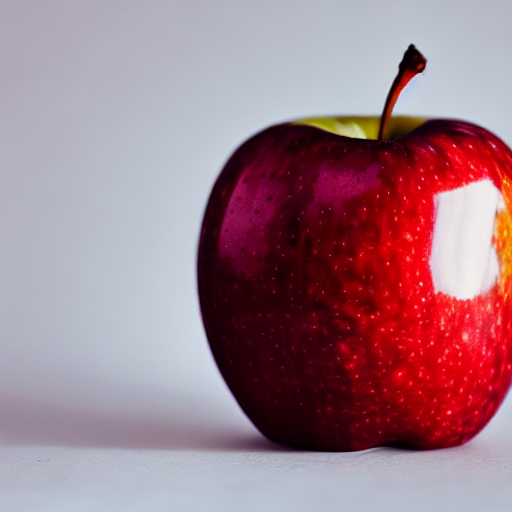

In [ ]:
prompt = 'photograph of an apple'
img = pipe(prompt).images[0]
img

  0%|          | 0/50 [00:00<?, ?it/s]

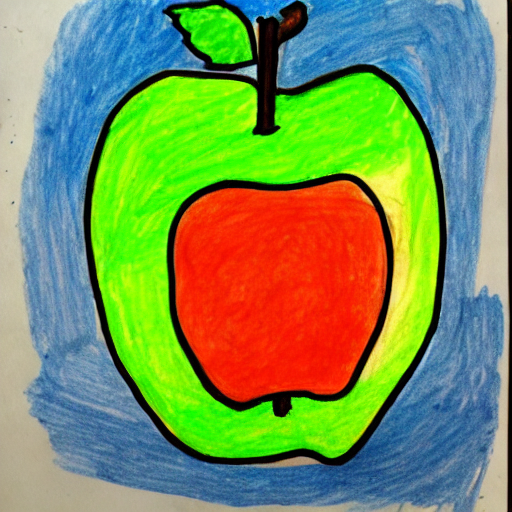

In [ ]:
prompt = 'a child drawing of an apple'
img = pipe(prompt).images[0]
img

### SD v2.x

In [ ]:
sd2 = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16)
sd2 = sd2.to("cuda")
sd2.enable_attention_slicing()
sd2.enable_xformers_memory_efficient_attention()

text_encoder/pytorch_model.fp16.safetensors not found


Fetching 22 files:   0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

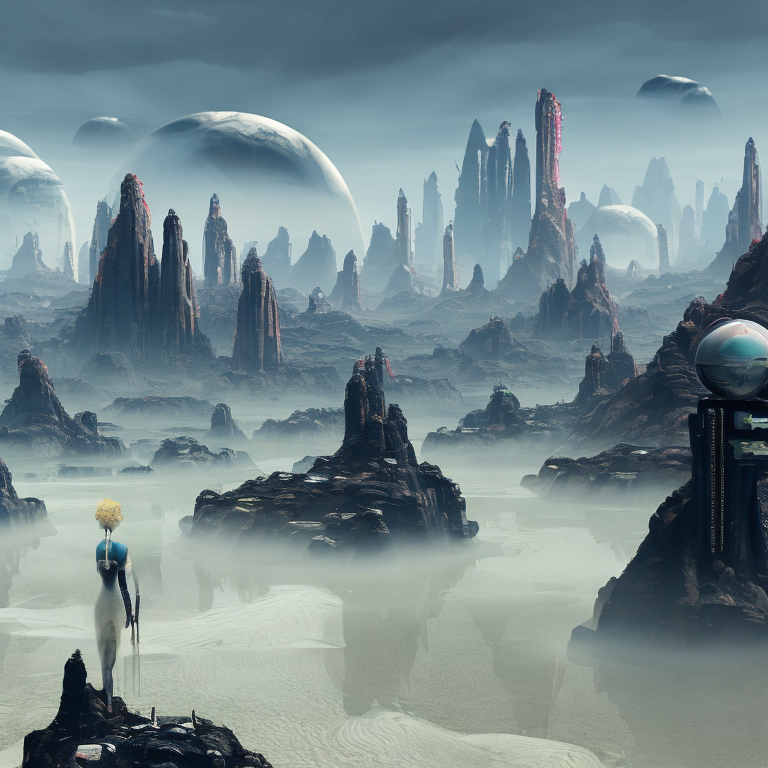

In [ ]:
prompt = "photo of a futuristic city on another planet, realistic, full hd"
negative_prompt = "buildings"
img = sd2(prompt, negative_prompt = negative_prompt).images[0]
img